In [1]:
from quantum_calculation.hartree_fock import HartreeFock

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 1.2'
hf = HartreeFock(H2, 'sto-3g')
print(hf.overlap)
print(hf.coordinates)
print(hf.basis_functions)

[[1.       0.728649]
 [0.728649 1.      ]]
[{'symbol': 'H', 'coord': (0.0, 0.0, 0.0)}, {'symbol': 'H', 'coord': (0.0, 0.0, 1.2)}]
{'alpha': array([[3.42525091, 0.62391373, 0.1688554 ],
       [3.42525091, 0.62391373, 0.1688554 ]]), 'd': array([[0.15432897, 0.53532814, 0.44463454],
       [0.15432897, 0.53532814, 0.44463454]])}


In [ ]:
from quantum_calculation.hartree_fock import HartreeFock

H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 1.2'
hf = HartreeFock(H2, '6-31g')
print(hf.overlap)
print(hf.coordinates)
print(hf.basis_functions)

In [2]:
from quantum_calculation.basis_set.basis_set import BasisSet


basis_set = BasisSet('6-31G')
basis_set.show_basis_set()

Basis set: 6-31G
H (Charge: 1): {'S3': array([[18.73113696,  0.0334946 ],
       [ 2.82539437,  0.23472695],
       [ 0.64012169,  0.81375733]]), 'S1': array([[0.16127776, 1.        ]])}


In [2]:
from quantum_calculation.hartree_fock import HartreeFock


H2 = 'H 0.0 0.0 0.0; H 0.0 0.0 0.7'
hf = HartreeFock(H2, 'sto-3g')
hf.rohf()

print(hf.energy_elec)
print(hf.energy_total)
print(hf.nuclear_repulsion)

SCF converged energy: 2.366568400695483
0.9379974006954829
2.366568400695483
1.428571


SCF converged energy: -0.40332637072663236
SCF converged energy: 3.103415237714141
SCF converged energy: -0.5538532389511965
SCF converged energy: 2.87532539876191
SCF converged energy: -0.6724949158400284
SCF converged energy: 2.678822973788244
SCF converged energy: -0.7669180694239177
SCF converged energy: 2.507046084257704
SCF converged energy: -0.8425956765201215
SCF converged energy: 2.354959677892509
SCF converged energy: -0.9035185536470525
SCF converged energy: 2.219277902927395
SCF converged energy: -0.9526635483432384
SCF converged energy: 2.0971056679049136
SCF converged energy: -0.9922857479578213
SCF converged energy: 1.9866225499576986
SCF converged energy: -1.0241282791802333
SCF converged energy: 1.8861159747675924
SCF converged energy: -1.0495504894693475
SCF converged energy: 1.7944185162457835
SCF converged energy: -1.0696325658505876
SCF converged energy: 1.710469039665747
SCF converged energy: -1.0852457774496598
SCF converged energy: 1.6333658350107596
SCF converg

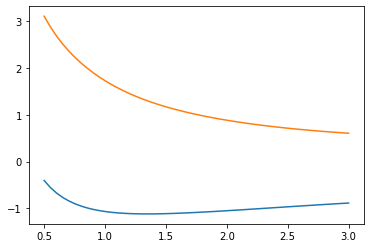

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_calculation.hartree_fock import HartreeFock

bond_length = np.linspace(0.5, 8.0, 50)

rhf_energy = []
rohf_energy = []
for r in bond_length:
    H2 = f'H 0.0 0.0 0.0; H 0.0 0.0 {r}'
    hf = HartreeFock(H2, 'sto-3g')
    hf.rhf()
    rhf_energy.append(hf.energy)

    hf = HartreeFock(H2, 'sto-3g')
    hf.rohf()
    rohf_energy.append(hf.energy)

plt.plot(bond_length, rhf_energy)
plt.plot(bond_length, rohf_energy)

지금 생각난 것:

1. Mol class, HF class 따로 만들기
2. __rhf(params), __rohf(params) 함수 따로 만들기
3. params에는 overlap, kinetic 등의 행렬이 포함된 딕셔너리 또는 컨테이너 클래스
4. ROHF에서 unpaired spin 개수가 곧 open shell electron 개수니까 그냥 빼면 됨